In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [45]:
magazine_ch = pd.read_csv('./magazine/final/magazine_Ch.csv', sep='|', encoding = 'utf-8')

In [46]:
noun_df = pd.read_csv('noun_celine.csv', sep ='|', encoding = 'utf-8')

In [47]:
mag_ch = magazine_ch[['magazine', 'brand','title', 'link', 'date', 'word_chanel','ADFN']]

In [48]:
noun_df.head()

,article,noun
0,"['골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sand...","['골드', '장식', '포인트', '케이프', '체크', '코트', '산드로', ..."
1,"[' 빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, 셀린느(Celine).']","['빈티', '주름', '워싱', '특징', '데님', '팬츠', '가격', '미정..."
2,[' 1970년대 에스닉한 분위기가 물씬 풍기는 셀린느의 방패 모양 숄더백.'],"['에스', '분위기', '물씬', '셀린느', '방패', '모양', '숄더백']"
3,"['재킷, 셔츠, 슈즈는 셀린느(Celine), 블랙 스커트는 렉토, 이어링은 스타...","['재킷', '셔츠', '슈즈', '셀린느', '블랙', '스커트', '렉토', '..."
4,"['재킷, 셔츠, 네크리스는 모두 셀린느(Celine), 팬츠는 다잉브리드, 슈즈는...","['재킷', '셔츠', '크리스', '모두', '셀린느', '팬츠', '다잉브', ..."


In [49]:
mag_ch.head()

,magazine,brand,title,link,date,word_chanel,ADFN
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로",http://www.allurekorea.com/2020/11/15/%ea%b0%8...,2020-11-15,"메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']"
1,A,Ch,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","['인스타그램', '에디터', '디자이너', '인', '플루', '계정', '막',..."
2,A,Ch,"올가을 시즌의 주인공, 체인의 활약",http://www.allurekorea.com/2020/10/18/%ec%98%a...,2020-10-18,체인과 진주의 결합으로 우아함을 배가한 CHANEL의 액세서리들.,"['체인', '진주', '결합', '우아함을', 'CHANEL', '액세서리']"
3,A,Ch,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,"생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', ..."
4,A,Ch,가을의 그림자만큼 길어진 롱부츠 12가지,http://www.allurekorea.com/2020/10/02/%ea%b0%8...,2020-10-02,"컬러블록이 조화로운 부츠는 가격미정, CHANEL(CHANEL). 와인색 니하이...","['컬러', '블록', '조화로운', '부츠', 'CHANEL', 'CHANEL',..."


In [50]:
mag_ch.loc[0, 'ADFN'][2]

'메'

### 쪼개진 단어 붙이기

#### 사전에 등록했으면 하는 단어
['레디 투 웨어', '공방', '트위드', 'FW', 'F/W', 'SS', 'S/S', '오간자', '아름다움', '그랑 팔레', '캐주얼', '런웨이', 
 '오프숄더', '레이어드', '인스타그램', '스타일링']

In [64]:
for word in mag_ch['ADFN']:
    if "'링'" in word:
        print(word)
        print('-'*50)

['주변', '친구', '좋아하고', '사고', '익숙한', '브랜드', '뭐', '있지', 'CHANEL', '에르메스', '루이', '비통', '펜디', 'CELINE', '지방시', '베', '네타', '이름', '단번', '만', '명품', '무턱', '대고', '투자', '없다', '의심', '여지', '시기', '명품', '브랜드', '주식', '게', '관심', '있어', '종목', '주로', '네이버', '카카오', '언택트', '관련', '주', '바이오', '사이버', '결제', '차', '전지', '비대', '산업', '차', '산업', '새로운', '산업', '종목', '아닌가', '상대', '장주', '관련', '주', '시대', '역행', '느낌', '수도', '있겠다', '얘기', '대부분', '명품', '브랜드', '역사', '스토리', '장인정신', '영유', '럭셔리', '브랜드', '갈망', '시대', '변하고', '경기', '나빠도', '늘', '존재', '법', '일부', '계층', '과시', '욕', '허영', '심', '수요', '베블런', '효과', '럭셔리', '브랜드', '마케팅', '전략', '자리', '일부', '브랜드', '발표', '백화점', '개점', '오픈', '런', '사태', '알', '사지', '세대', '명품', '살', '준비', '있다는', '가치', '전망', '실제', '코로나', '급속도', '현재', '빠른', '회복', '세', '보이', 'LVMH', ',', '에르메스', '인터내셔널', ',', '케어', '링', '상승', '회복하는', 'CHANEL', '비상', '주식', '구입', '없다', '주식', '투자', '공부', '책', '주식', '투자', '무작정', '해외', '주식', '투자자', 'GDP', '성장', '률', '낮고', '통화', '증시', '안정', '위험', '수익', '목표', '미국', 'EU', '일본', '선진국', '주식', '매수', '

In [52]:
# 스타일링
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'스타', '일링'", "스타일링")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# 레디 투 웨어
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'레디', '투', '웨어'", "레디투웨어")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
# 트위드
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'트', '위드'", "트위드")

# 캐주얼
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'캐, '주얼'", "캐주얼")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [55]:
# FW / SS
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'F', 'W'", "FW")
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'S', 'S'", "SS")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# 스포티
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'스포', '티'", "스포티")

mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'벨루', '티'", "벨루티")
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'베네', '티'", "베네티")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [57]:
# 테일러 / 레이어
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'테일러', '드'", "테일러드")
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'레이어', '드'", "레이어드")

mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'에스', '닉'", "에스닉")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [58]:
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace('빈티', "빈티지")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
mag_ch['ADFN'] = mag_ch['ADFN'].str.replace("'방'", "'공방'")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
mag_ch.to_csv('./magazine/final/magazine_ch_stickword.csv', sep='|', encoding ='utf-8', index=False)

### 한국어 NLP를 위한 konlpy 설치

In [26]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\i\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [2]:
# 어프라이어리(Apriori)
from apyori import apriori

5개만 샘플로 진행

In [34]:
sample_list=[]
for i in range(5):
    sample_list.append(dd[i][:10])
    

In [35]:
sample_list[0]

['골드', '장식', '포인트', '케이프', '체크', '코트', '산드로', '데님', '팬츠', '가격']

In [36]:
for i in range(len(sample_list)):
    sample_list[i].append('셀린느')

In [37]:
sample_list

[['골드', '장식', '포인트', '케이프', '체크', '코트', '산드로', '데님', '팬츠', '가격', '셀린느'],
 ['빈티', '주름', '워싱', '특징', '데님', '팬츠', '가격', '미정', '셀린느', '셀린느'],
 ['에스', '분위기', '물씬', '셀린느', '방패', '모양', '숄더백', '셀린느'],
 ['재킷', '셔츠', '슈즈', '셀린느', '블랙', '스커트', '렉토', '이어링', '스타일', '리스트', '셀린느'],
 ['재킷', '셔츠', '크리스', '모두', '셀린느', '팬츠', '다잉브', '리드', '슈즈', '던힐', '셀린느']]

In [38]:
# 지지도(support) : P(A∩B)
result = list(apriori(sample_list, min_support = 0.01))
df = pd.DataFrame(result)
df

,items,support,ordered_statistics
0,(가격),0.4,"[((), (가격), 0.4, 1.0)]"
1,(골드),0.2,"[((), (골드), 0.2, 1.0)]"
2,(다잉브),0.2,"[((), (다잉브), 0.2, 1.0)]"
3,(던힐),0.2,"[((), (던힐), 0.2, 1.0)]"
4,(데님),0.4,"[((), (데님), 0.4, 1.0)]"
...,...,...,...
4692,"(팬츠, 장식, 코트, 데님, 산드로, 케이프, 체크, 셀린느, 가격, 포인트)",0.2,"[((), (팬츠, 장식, 코트, 데님, 산드로, 케이프, 체크, 셀린느, 가격, ..."
4693,"(팬츠, 장식, 코트, 골드, 데님, 산드로, 케이프, 체크, 셀린느, 포인트)",0.2,"[((), (팬츠, 장식, 코트, 골드, 데님, 산드로, 케이프, 체크, 셀린느, ..."
4694,"(팬츠, 던힐, 셔츠, 리드, 슈즈, 크리스, 셀린느, 재킷, 다잉브, 모두)",0.2,"[((), (팬츠, 던힐, 셔츠, 리드, 슈즈, 크리스, 셀린느, 재킷, 다잉브, ..."
4695,"(이어링, 셔츠, 블랙, 슈즈, 스타일, 리스트, 스커트, 셀린느, 재킷, 렉토)",0.2,"[((), (이어링, 셔츠, 블랙, 슈즈, 스타일, 리스트, 스커트, 셀린느, 재킷..."


In [39]:
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
179,"(셀린느, 팬츠)",0.6,"[((), (셀린느, 팬츠), 0.6, 1.0), ((셀린느), (팬츠), 0.6,...",2
172,"(셀린느, 재킷)",0.4,"[((), (셀린느, 재킷), 0.4, 1.0), ((셀린느), (재킷), 0.4,...",2
80,"(셀린느, 데님)",0.4,"[((), (셀린느, 데님), 0.4, 1.0), ((데님), (셀린느), 1.0,...",2
192,"(재킷, 슈즈)",0.4,"[((), (재킷, 슈즈), 0.4, 1.0), ((슈즈), (재킷), 1.0, 2...",2
163,"(셀린느, 셔츠)",0.4,"[((), (셀린느, 셔츠), 0.4, 1.0), ((셀린느), (셔츠), 0.4,...",2
49,"(팬츠, 가격)",0.4,"[((), (팬츠, 가격), 0.4, 1.0), ((가격), (팬츠), 1.0, 1...",2
185,"(재킷, 셔츠)",0.4,"[((), (재킷, 셔츠), 0.4, 1.0), ((셔츠), (재킷), 1.0, 2...",2
165,"(셀린느, 슈즈)",0.4,"[((), (셀린느, 슈즈), 0.4, 1.0), ((셀린느), (슈즈), 0.4,...",2
181,"(셔츠, 슈즈)",0.4,"[((), (셔츠, 슈즈), 0.4, 1.0), ((셔츠), (슈즈), 1.0, 2...",2
41,"(셀린느, 가격)",0.4,"[((), (셀린느, 가격), 0.4, 1.0), ((가격), (셀린느), 1.0,...",2


### networkx 그래프 정의

In [41]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [42]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [48]:
pos = nx.spring_layout(G)

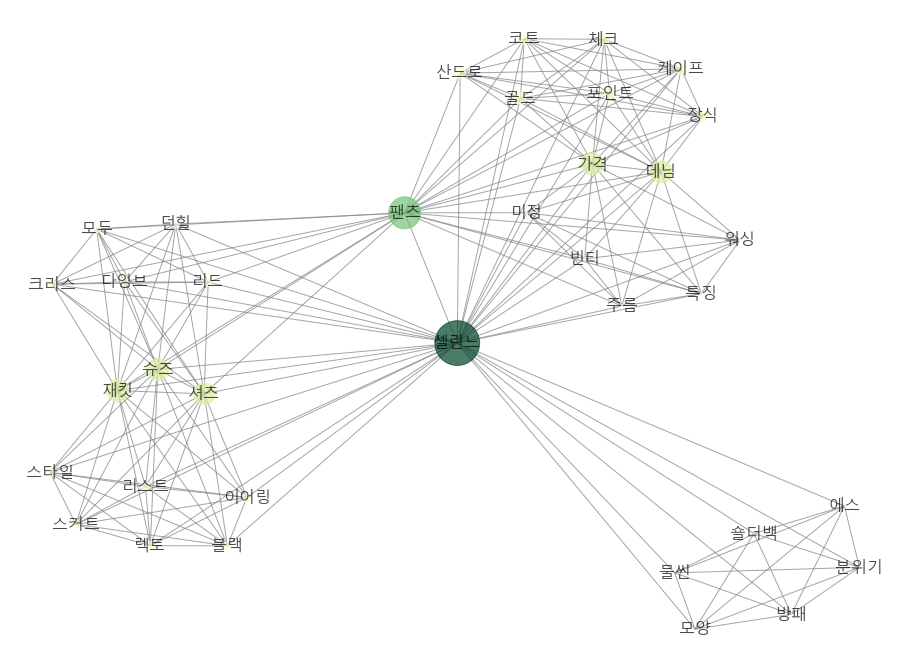

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)
plt.show()
plt.savefig('./celine_network.png', bbox_inches = 'tight')

## 실제 데이터

In [ ]:
# 지지도(support) : P(A∩B)
result = list(apriori(dd, min_support = 0.01))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)